Solving the system of differential equations:
$$
\frac{d^2\mathbf{x}}{dt^2}=k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}\mathbf{x}
$$
gives
$$
\mathbf{x} = \mathbb{cosh}(t\sqrt{\mathbf{A}})
$$
where:
$$
\mathbf{A} = k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}
$$
and you can generalize this system for n springs

[-4.230963040359426 0.8540139024076453 0.0 0.0 0.0 0.0 0.0; 4.230963040359426 -1.1275615262511935 1.2108151368482283 0.0 0.0 0.0 0.0; 0.0 0.2735476238435482 -3.5146804255883124 0.6470591144747895 0.0 0.0 0.0; 0.0 0.0 2.3038652887400843 -1.2928260070482787 3.2087419309500524 0.0 0.0; 0.0 0.0 0.0 0.6457668925734892 -4.741120851686718 1.5160711891029655 0.0; 0.0 0.0 0.0 0.0 1.532378920736666 -5.800864289121399 2.8399977931107125; 0.0 0.0 0.0 0.0 0.0 4.284793100018433 -3.4048831630626157]

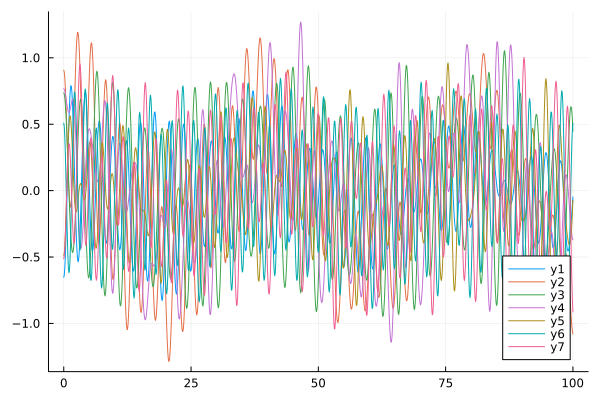

In [61]:
using Plots, FFTW, Random, Distributions

d = Normal(0, 1)
nd = truncated(Normal(0, 10), 0.0, Inf)
td = truncated(d, 0.0, Inf)

spring_n = convert(Int, ceil(rand(nd)))
spring_ms = rand(td, spring_n)
spring_ks = rand(td, spring_n)

A = zeros(spring_n,spring_n)

for i ∈ 1:spring_n
    for j ∈ 1:spring_n
        if i == 1 && j == 1
            A[i,j] = -(spring_ks[1])/spring_ms[1]
        
        elseif i == j
            A[i,j] = -spring_ks[j]/spring_ms[j-1] -(spring_ks[j])/spring_ms[j]

        elseif i == j-1
            A[i,j] = (spring_ks[j])/spring_ms[i]
        
        elseif i == j+1
            A[i,j] = (spring_ks[j])/spring_ms[j]
        
        end
    end
end
print(A)

t = range(0, 100, length=1000)

initial = rand(d, spring_n)

x = [cosh(i * sqrt(A)) * initial for i ∈ t]

x_vals = [[real(i[j]) for i ∈ x] for j ∈ 1:spring_n]

plot(t, [x_vals])

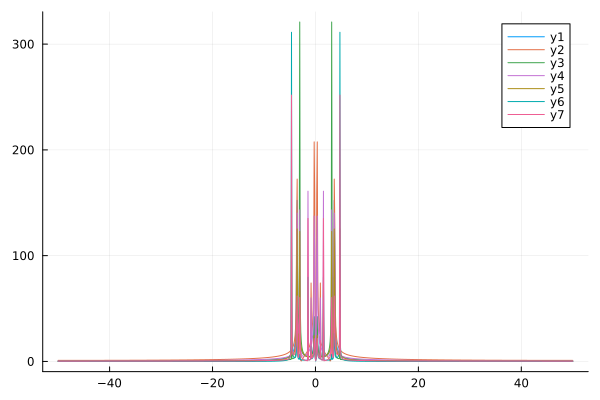

In [62]:
fft_x_vals = [fftshift(fft(i)) for i ∈ x_vals]

mag_fft_x_vals = [[abs(i) for i ∈ j] for j ∈ fft_x_vals]
arg_fft_x_vals = [[angle(i) for i ∈ j] for j ∈ fft_x_vals]

plot([i-t[end]/2+t[begin]/2 for i ∈ t], mag_fft_x_vals)

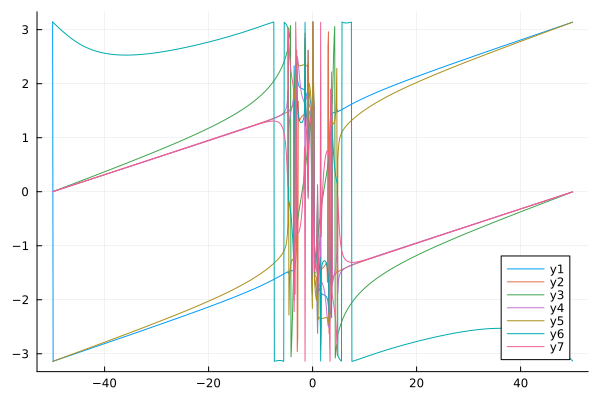

In [63]:
plot([i+t[begin]/2-t[end]/2 for i ∈ t], [arg_fft_x_vals])

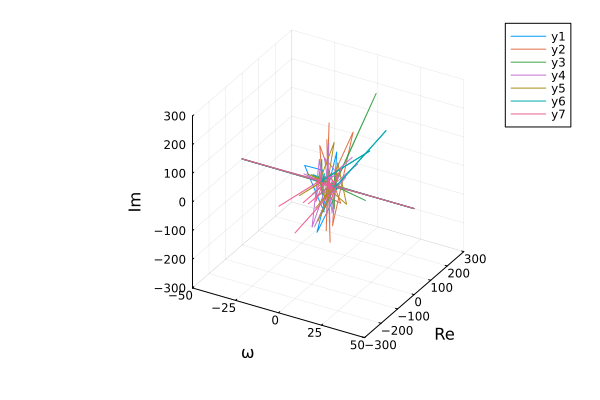

In [64]:
re_fft_x_vals = [[real(i) for i ∈ j] for j ∈ fft_x_vals]
im_fft_x_vals = [[imag(i) for i ∈ j] for j ∈ fft_x_vals]

plot(
    [i - (t[end]-t[begin])/2 for i ∈ t],
    re_fft_x_vals,
    im_fft_x_vals,
    xlimit=(t[begin] * 3/2 - t[end]/2,t[end]/2-t[begin]/2),
    ylimit=(-300,300),
    zlimit=(-300,300),
    xlabel="ω",
    ylabel="Re",
    zlabel="Im",
)